# Unemployment analysis with python

Import the library for data analysis and data cleaning

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
%matplotlib inline

In [25]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [26]:
import plotly.express as px

In [27]:
init_notebook_mode(connected=True)

Read the data by using pandas library

In [28]:
data= pd.read_csv('Unemployment in India.csv')

In [29]:
df=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [30]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


using countplot to know which area have high Estimated Unemployment rate

<AxesSubplot:xlabel='Area', ylabel='count'>

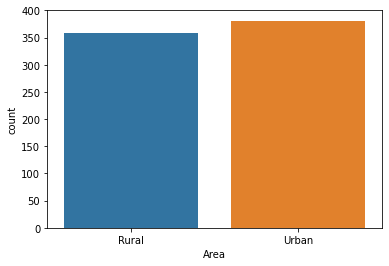

In [31]:
sns.countplot(x='Area',data=data)

In [32]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


size of data 'Unemployment in India.csv'

In [33]:
data.shape

(768, 7)

size of data 'Unemployment_Rate_upto_11_2020.csv'

In [34]:
df.shape

(267, 9)

In [35]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [36]:
df.columns=['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']

In [37]:
df.tail()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


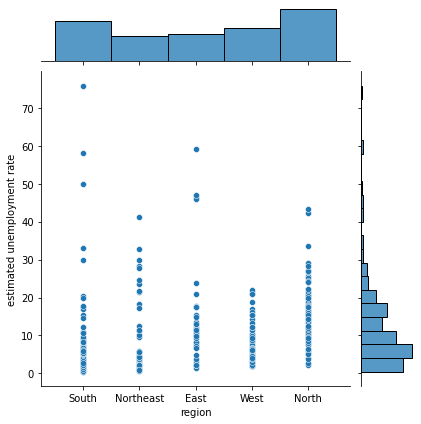

In [38]:
sns.jointplot(x='region',y='estimated unemployment rate',data=df)

In [39]:
fig = px.box(df, x='state', y='estimated unemployment rate', color='state', title='Unemployment rate per States', template='seaborn')


In [40]:
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [41]:
plot_ump = df[['estimated unemployment rate', 'state']]
data_unemp = plot_ump.groupby('state').mean().reset_index()
data_unemp = data_unemp.sort_values('estimated unemployment rate')
fig = px.bar(data_unemp, x='state', y='estimated unemployment rate', color='state',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

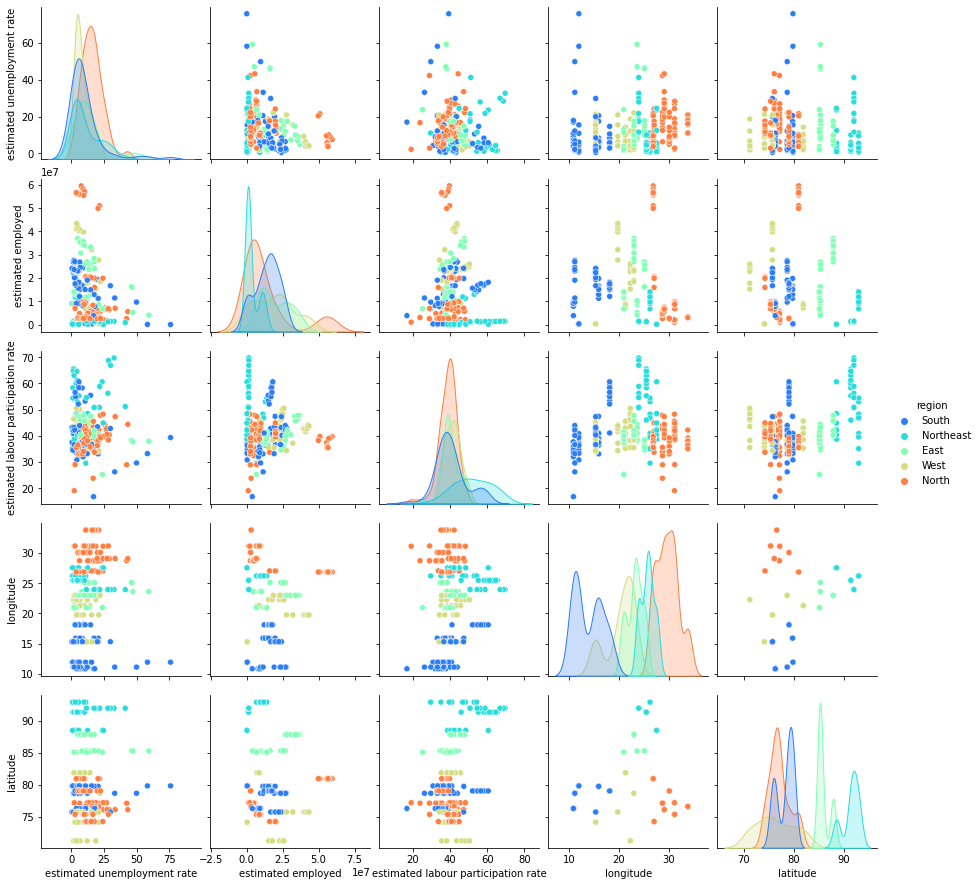

In [42]:
sns.pairplot(df,hue='region',palette='rainbow')

In [50]:
df["date"] = pd.to_datetime(df["date"])
df["Month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df.drop("date",axis=1,inplace=True)
import calendar
df["Month_Name"] = df["Month"].apply(lambda x : calendar.month_abbr[x])

In [52]:
df.head()

,state,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,Month,year,Month_Name
0,Andhra Pradesh,M,5.48,16635535,41.02,South,15.9129,79.74,1,2020,Jan
1,Andhra Pradesh,M,5.83,16545652,40.90,South,15.9129,79.74,2,2020,Feb
2,Andhra Pradesh,M,5.79,15881197,39.18,South,15.9129,79.74,3,2020,Mar
3,Andhra Pradesh,M,20.51,11336911,33.10,South,15.9129,79.74,4,2020,Apr
4,Andhra Pradesh,M,17.43,12988845,36.46,South,15.9129,79.74,5,2020,May


In [54]:
import plotly.express as px

fig = px.scatter_geo(df,'longitude', 'latitude', color="region",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="Month_Name",scope='asia',title='Impack of lockdown on employement across regions')

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[60, 100],oceancolor="#6dd5ed",
    showocean=True)


fig.show()

<AxesSubplot:>

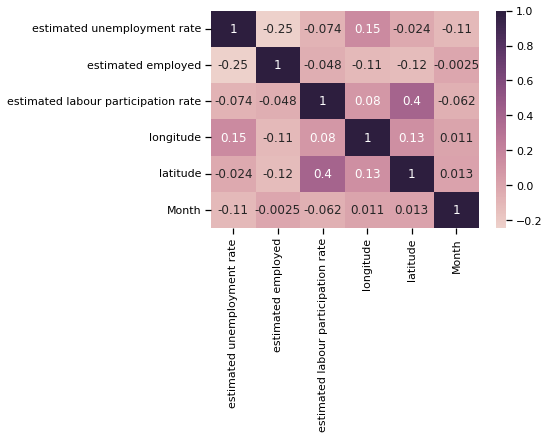

In [57]:
heatmap= df[['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate', 'longitude', 'latitude', 'Month']]
heatmap = heatmap.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=heatmap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [59]:
fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate'],
                        color='region')
fig.show()

Most impacted States/Union Territories
* Puducherry
* Jharkhand
* Bihar
* Haryana
* Tripura